# Binary digit recognition
###  Problem Statement
The task is to classify digits 1 and 0.
This Binary Digit Recognition project focuses on building a deep neural network to classify binary digits (0 and 1) using 20 by 20 pixel gray scale images. Using deep learning techniques, the model will learn to recognize and distinguish between the two digits.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Dataset

The `load_data()` function loads the data into the variables `X` and `y`:

- The dataset contains 1000 training examples of handwritten digits, limited to the digits **0** and **1**.  
    - Each training example is a **20x20-pixel grayscale image** of a digit. 
        - Each pixel is represented as a floating-point number indicating the grayscale intensity at that location.
        - The **20x20 grid of pixels** is "unrolled" into a 400-dimensional vector.
        - Each training example becomes a single row in the data matrix `X`, which is of shape **1000 x 400**.
    - **`X`** is a matrix where each row represents a training example:
    
    $$
    X = 
    \begin{pmatrix} 
    \vdots \\
    x^{(1)} \\
    x^{(2)} \\
    \vdots \\ 
    x^{(m)} 
    \end{pmatrix}
    $$ 
    
    - `X` is a **1000 x 400** matrix, where each row is a flattened 400-dimensional vector corresponding to a 20x20 pixel image.

- The second part of the training set is the label vector `y`, which is **1000 x 1** dimensional. It contains the labels for the corresponding training set:
    - **`y = 0`** if the image is a **digit 0**.
    - **`y = 1`** if the image is a **digit 1**.

The dataset is based on the **MNIST dataset** ([source](http://yann.lecun.com/exdb/mnist/)).


In [2]:
X, y = load_data()

In [5]:
print('The first element of X :', X[0])
#it is a 20 by 20 image pixel values, vector of 400
#Neural nets use these values to play with images

The first element of X : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00


In [6]:
print('The first element of X :', X[0].shape)


The first element of X : (400,)


In [7]:
#dimensions of X and y
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


### Visualizing the Data

- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

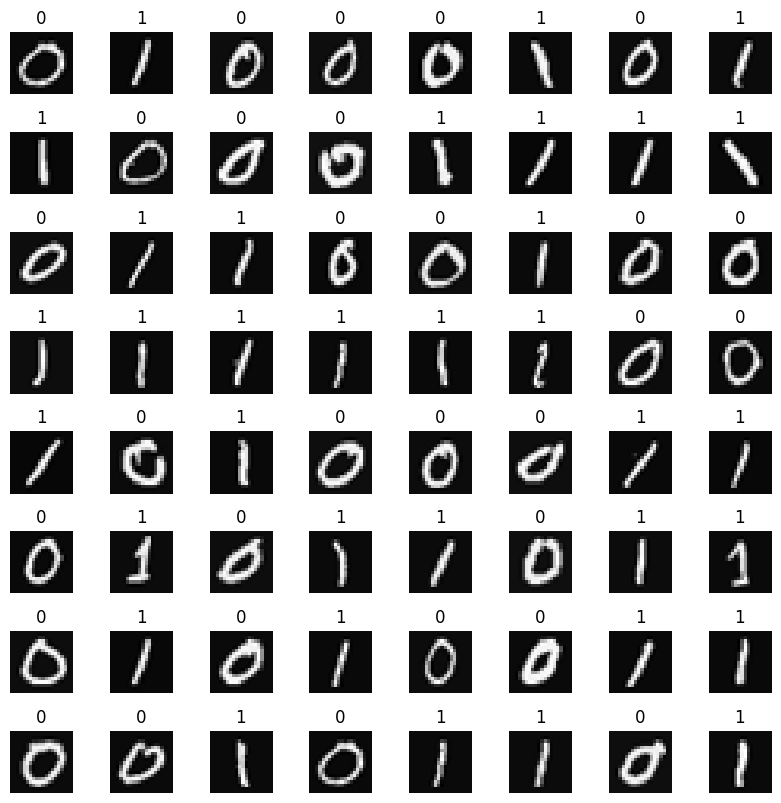

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

### Neural Network Architecture Overview

We have a simple feedforward neural network with three dense layers using sigmoid activation functions. The input vector **X** has 400 units.

1. **Layer 1:**
   - Input: 400 units (X)
   - Output: 25 units
   - Weights **W1** shape: (400, 25)
   - Bias **b1** shape: (25,)
   - Total parameters in Layer 1:
     \
      = 400 * 25 + 25 = 10,025
     

2. **Layer 2:**
   - Input: 25 units (from Layer 1 output)
   - Output: 15 units
   - Weights **W2** shape: (25, 15)
   - Bias **b2** shape: (15,)
   - Total parameters in Layer 2:
     \
     = 25 * 15 + 15 = 390
     

3. **Layer 3 (Output Layer):**
   - Input: 15 units (from Layer 2 output)
   - Output: 1 unit (probability)
   - Weights **W3** shape: (15, 1)
   - Bias **b3** shape: (1,)
   - Total parameters in Layer 3:
     \
           = 15 * 1 + 1 = 16
     \

### Total Parameters
The total number of parameters for the model is the sum of parameters across all layers:
\[
\text{Total params} = 10,025 + 390 + 16 = 10,431
\]

---
This model consists of **10,431** parameters in total.


In tensorflow we build models layer by layer. We specify the layer's output dimensions and this determines the next layer's input dimension.
The input dimension of the first layer is derived from the size of the input data specified in the model.fit statement. 

In [9]:
model = Sequential (
    [
        tf.keras.Input(shape = (400, )),

        Dense(units=25, activation="sigmoid"),
        Dense(units=15, activation="sigmoid"), 
        Dense(units=1, activation ="sigmoid")
    ],  name = "my_model"
)

In [10]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

We can extract the weights of the model like

In [12]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


### Compile and fit the model

In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X, y,
    epochs = 20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6708
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5200
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3487
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2271
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1509
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1122
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0872
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0744
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0569
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0490
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0429
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0434
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0348
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0350
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0330
Epoch 16/20
32/32 ━


To run the model on an example to make a prediction, we will use Keras predict function. The input to predict is an array so the single example is reshaped to be two dimensional.

In [19]:
prediction = model.predict(X[9].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[400].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
 predicting a zero: [[0.01449271]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
 predicting a one:  [[0.013912]]



The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one. As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [21]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"number predicted after threshold: {yhat}")

number predicted after threshold: 0
